<a href="https://colab.research.google.com/github/adnanagbaria/MLcourse/blob/main/Lec4_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression
Agenda:
* Regression tasks in ML
* The main Idea of Fitting a Line to Data
* Linear Regression
* Multiple Linear Regression
* Using Linear models for t-tests and ANOVA
* Design Matrices for Linear Models
* Regularization L2: Ridge Regression
* Regularization L1: Lasso Regression
* Ridge and Lasso Regression Visualized
* Regularization Elastic Net Regression
* Assumptions of Linear Regression
* Gradient Descent
* Stochastic Gradient Descent

**Regression** is a fundamental concept in machine learning and statistics used to model the relationship between a dependent variable (what you're trying to predict) and one or more independent variables (features or inputs).

**In Machine Learning:** Regression is a supervised learning task where the model learns from labeled data to predict numeric outcomes.

# Linear Regression
Models a straight-line relationship: $y = a x + b$,
where $y$ is the predicted value, $x$ is the input, $a$ is the slope, and
$b$ is the intercept.

**Multiple Linear Regression:** Involves multiple input variables:

$y = a_1x_1 + \cdots + a_nx_n + b$

# Least Squares
The Least Squares method is a standard approach used in linear regression to find the best-fitting line through a set of data points.

minimize the sum of squared differences between the observed actual outcomes and the outcomes predicted by the linear model.

**Mathematically:** Given data points $(x_1,y_1), \cdots, (x_n, y_n)$ and the line:

$\hat{y} = ax + b$

The residual for each point is: $e_i = y_i - \hat{y_i} = y_i - (ax_i + b)$

Least Squares Error (objective function) is:

SSE = $\Sigma_{i=1}^n(y_i -(ax_i + b))^2$

We want to find the values of $a$ and $b$ that minimize SSE.

(shoe thw Slides 4 to 16 of ML_04)

Coefficients (intercept, slope):
[[4.22215108]
 [2.96846751]]


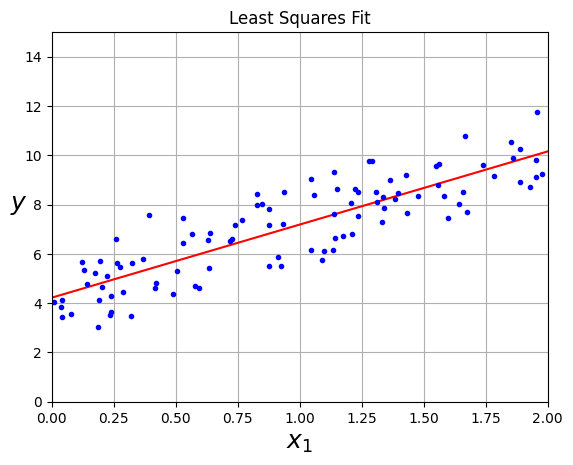

In [ ]:
# prompt: give an example of Least Squares

import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add a bias term (intercept) to X
X_b = np.c_[np.ones((100, 1)), X]

# Calculate the coefficients using the Normal Equation (Least Squares solution)
# The formula is: theta = (X_b^T * X_b)^(-1) * X_b^T * y
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print("Coefficients (intercept, slope):")
print(theta_best)

# Predict values using the calculated coefficients
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)

# Plot the original data and the fitted line
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title("Least Squares Fit")
plt.grid(True)
plt.show()

# Step-by-Step: Analytical Solution (Simple Linear Regression)
Given data points $(x_1,y_1), \cdots, (x_n, y_n)$, use these formulas:
1. Calculat slope $a = \frac{\Sigma((x_i - \bar{x})(y_i - \bar{y}))}{\Sigma(x_i - \bar{x})^2}$
2. Intercept $b= \bar{y} - a\bar{x}$



In [ ]:
import numpy as np

x = np.array([1, 2, 3])
y = np.array([2, 3, 5])

x_mean = np.mean(x)
y_mean = np.mean(y)

a = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
b = y_mean - a * x_mean

print(f"Slope (a): {a}")
print(f"Intercept (b): {b}")


Slope (a): 1.5
Intercept (b): 0.3333333333333335


# Linear Regrission
(shoe thw Slides 17 to 51 of ML_04)

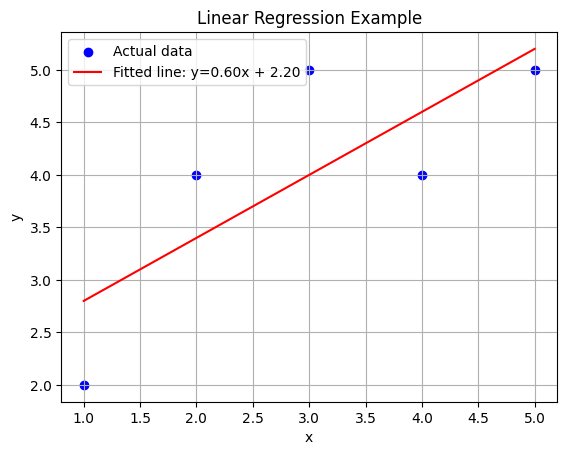

In [ ]:
# Linear Regression from Scratch (No Libraries)
import numpy as np
import matplotlib.pyplot as plt

# Sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Step 1: Calculate means
x_mean = np.mean(x)
y_mean = np.mean(y)

# Step 2: Calculate coefficients
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean) ** 2)
a = numerator / denominator
b = y_mean - a * x_mean

# Step 3: Predict values
y_pred = a * x + b

# Step 4: Plot
plt.scatter(x, y, color='blue', label='Actual data')
plt.plot(x, y_pred, color='red', label=f'Fitted line: y={a:.2f}x + {b:.2f}')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression Example")
plt.legend()
plt.grid(True)
plt.show()


Intercept: [4.14291332]
Coefficient (Slope): [[2.79932366]]
Mean Squared Error (MSE): 0.6536995137170021
R-squared (R2): 0.8072059636181392


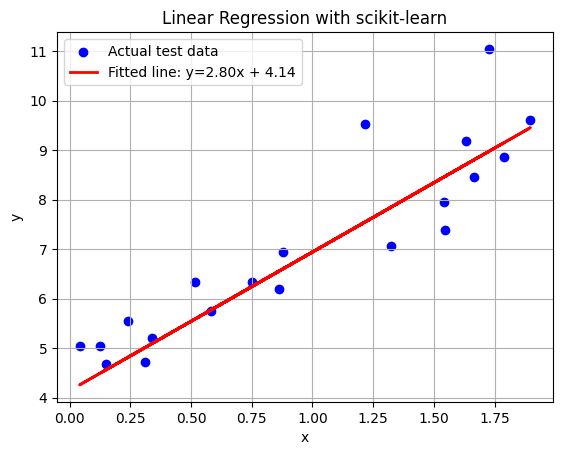

In [ ]:
# prompt: Give an example of linear regression

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generate more complex sample data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Print the coefficients (slope) and intercept
print("Intercept:", model.intercept_)
print("Coefficient (Slope):", model.coef_)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Plot the original data and the fitted line
plt.scatter(X_test, y_test, color='blue', label='Actual test data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label=f'Fitted line: y={model.coef_[0][0]:.2f}x + {model.intercept_[0]:.2f}')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression with scikit-learn")
plt.legend()
plt.grid(True)
plt.show()



# Multiple Linear Regression
Multiple Linear Regression is an extension of simple linear regression where we model the relationship between a dependent variable and two or more independent variables.

**The Formula:**

$y = b_0 + b_1x_1 + b_2x_2 + \cdots + b_nx_b$

**Example:** Predicting house price using:
* Number of bedrooms
* Square footage
* Age of the house

Price = $b_0 + b_1$Bedrooms + $b_2$Size + $b_3$Age

In [ ]:
import numpy as np

# Sample data (2 features)
# x: shape (n_samples, n_features)
X = np.array([
    [1, 1],
    [1, 2],
    [2, 2],
    [2, 3]
])
# y: shape (n_samples,)
y = np.dot(X, np.array([1, 2])) + 3  # y = 1*x1 + 2*x2 + 3

# Add intercept (bias) term to X
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add a column of ones

# Calculate weights using Normal Equation: θ = (XᵀX)⁻¹ Xᵀy
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print("Intercept and coefficients:", theta_best)


Intercept and coefficients: [3. 1. 2.]


# Using Linear models for t-tests and ANOVA
Using linear models for t-tests and ANOVA (Analysis of Variance) involves leveraging regression to evaluate statistical significance of predictors or group differences. Here’s how that works.

##Linear Models and t-tests
A t-test checks if a single coefficient in a linear model is significantly different from zero.

**In Regression:**
* Suppose your model is $y = \beta_0 + \beta_1x + ϵ$
* A t-test on $\beta_1$ checks whether the predictor $x$ has a statistically significant effect on $y$

  $t = \frac{\hat{\beta_1}}{SE(\hat{\beta_1})}$

* $\hat{\beta_1}$: estimated coefficient
* $SE(\hat{\beta_1})$: standard error of the coefficient

If the p-value for the t-statistic is low (typically < 0.05), you reject the null hypothesis that $\beta_1=0$

##Linear Models and ANOVA
ANOVA is used to compare variances across multiple groups — essentially, it checks if group means differ significantly.

**In Regression:**
* Encode group membership as dummy variables in a linear model.
* Use F-statistic to test whether any of the group predictors have a significant effect on the outcome.

F = Variance explained by the model/Variance NOT explained

This tells you if the overall model is significant.

**Example:**
Let’s say you're testing if two diets lead to different weight loss outcomes:
* Encode diets as categorical variables in regression
* Run regression: WeightLoss = $\beta_0 + \beta_1 Diet_1 + \beta_2 Diet_2 + ϵ$
* Use ANOVA to see if at least one diet is significantly different

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# data
import pandas as pd
data = {
    'WeightLoss': [2.3, 2.9, 3.1, 1.8, 2.7, 3.0],
    'Diet': ['A', 'B', 'B', 'A', 'C', 'C']
}

df = pd.DataFrame(data)

# Assume df is a DataFrame with columns 'WeightLoss' and 'Diet' (categorical)
model = smf.ols('WeightLoss ~ C(Diet)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


            sum_sq   df         F    PR(>F)
C(Diet)   1.043333  2.0  8.236842  0.060466
Residual  0.190000  3.0       NaN       NaN


--- Simple Linear Regression ---
Intercept: 1.0028
Coefficient (Slope): 2.0544
------------------------------


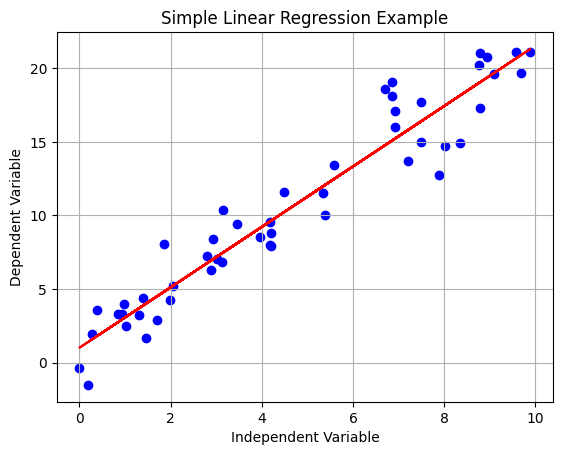

--- ANOVA using OLS ---
            sum_sq   df         F    PR(>F)
C(Diet)   1.043333  2.0  8.236842  0.060466
Residual  0.190000  3.0       NaN       NaN
------------------------------


In [ ]:
# prompt: give a simple example of Linear Models and ANOVA

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Linear Model (Simple Regression Example)
# Generate sample data
np.random.seed(1)
x = np.random.rand(50, 1) * 10  # Independent variable
y = 2 * x + 1 + np.random.randn(50, 1) * 2 # Dependent variable with noise

# Fit a simple linear regression model
model = LinearRegression()
model.fit(x, y)

# Print coefficients
print("--- Simple Linear Regression ---")
print(f"Intercept: {model.intercept_[0]:.4f}")
print(f"Coefficient (Slope): {model.coef_[0][0]:.4f}")
print("-" * 30)

# Plot the data and the fitted line
plt.scatter(x, y, color='blue')
plt.plot(x, model.predict(x), color='red')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Simple Linear Regression Example')
plt.grid(True)
plt.show()


# ANOVA Example (using the previous Diet data)
# Data is already defined as df in the preceding code
# data = {
#     'WeightLoss': [2.3, 2.9, 3.1, 1.8, 2.7, 3.0],
#     'Diet': ['A', 'B', 'B', 'A', 'C', 'C']
# }
# df = pd.DataFrame(data)

# Fit an OLS model with the categorical variable 'Diet'
# C(Diet) tells statsmodels to treat 'Diet' as a categorical variable
print("--- ANOVA using OLS ---")
model_anova = smf.ols('WeightLoss ~ C(Diet)', data=df).fit()

# Perform the ANOVA test
anova_table = sm.stats.anova_lm(model_anova, typ=2) # typ=2 is a common type for unbalanced designs
print(anova_table)
print("-" * 30)

# Interpretation of ANOVA output:
# The 'PR(>F)' column is the p-value for the 'C(Diet)' factor.
# If this p-value is less than your chosen significance level (e.g., 0.05),
# you reject the null hypothesis and conclude that there is a significant difference
# in 'WeightLoss' means across the different 'Diet' groups.

# Design Matrices for Linear Models
A design matrix (also called the model matrix or feature matrix) is a structured way to represent input data for use in linear regression or ANOVA.

**Structure:**
Suppose you want to model:
$y = \beta_0 + \beta_1x + ϵ$

The design matrix $X$ for $n$ observations and 2 features would look like:



# Ridge Regression
Ridge Regression is a type of linear regression that includes a penalty term to reduce overfitting by shrinking the coefficients.

**Why Use It?**
* Multicollinearity (features are correlated)
* Too many features
* Overfitting in standard linear regression

Ridge Regression helps by penalizing large coefficients.

**The Formula:**
Ridge modifies the loss function of linear regression:

$Loss = \Sigma(y_i - \hat{y_i})^2 + \lambda \Sigma\beta_j^2$

* First term = usual squared error
* Second term = L2 penalty (squares of coefficients)
* $λ$= regularization strength (higher = more shrinkage)

**Effect:**
* Keeps all features in the model.
* Shrinks coefficients toward 0 (but not exactly 0).


In [ ]:
from sklearn.linear_model import Ridge
import numpy as np

# Sample data
X = np.array([[1], [2], [3]])
y = np.array([1, 2, 3])

# Fit ridge regression
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)

print("Coefficient:", ridge.coef_)
print("Intercept:", ridge.intercept_)


Coefficient: [0.66666667]
Intercept: 0.6666666666666663


In [ ]:
# prompt: give a simple example of ridge regression

import numpy as np
# Generate some more complex data for demonstration
np.random.seed(42)
# Create correlated features to show Ridge's effect on multicollinearity
X_ridge = 2 * np.random.rand(100, 1)
X_ridge = np.c_[X_ridge, X_ridge + np.random.randn(100, 1) * 0.5] # Add a second correlated feature
y_ridge = 4 + 3 * X_ridge[:, 0].reshape(-1, 1) + np.random.randn(100, 1)

# Split data
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_ridge, y_ridge, test_size=0.2, random_state=42)

# Create a Linear Regression model for comparison
linear_reg = LinearRegression()
linear_reg.fit(X_train_r, y_train_r)
y_pred_linear = linear_reg.predict(X_test_r)
mse_linear = mean_squared_error(y_test_r, y_pred_linear)
r2_linear = r2_score(y_test_r, y_pred_linear)

print("--- Linear Regression (for comparison) ---")
print("Intercept:", linear_reg.intercept_)
print("Coefficients:", linear_reg.coef_)
print("MSE:", mse_linear)
print("R2:", r2_linear)
print("-" * 30)


# Create a Ridge Regression model
# alpha is the regularization strength (lambda in the formula)
# A higher alpha means stronger regularization
ridge_reg = Ridge(alpha=1.0) # You can experiment with different alpha values

# Train the Ridge model
ridge_reg.fit(X_train_r, y_train_r)

# Make predictions on the test data
y_pred_ridge = ridge_reg.predict(X_test_r)

# Print the coefficients and intercept
print("--- Ridge Regression (alpha=1.0) ---")
print("Intercept:", ridge_reg.intercept_)
print("Coefficients:", ridge_reg.coef_) # Notice these might be smaller than Linear Regression's

# Evaluate the model
mse_ridge = mean_squared_error(y_test_r, y_pred_ridge)
r2_ridge = r2_score(y_test_r, y_pred_ridge)

print("Mean Squared Error (MSE):", mse_ridge)
print("R-squared (R2):", r2_ridge)
print("-" * 30)

# Note: Ridge Regression is typically used when you have multiple features,
# especially if they are correlated. The effect of regularization is more
# apparent in those scenarios. In this 2D example (2 features), plotting
# the fitted plane would be needed to visualize the difference.

# Let's try a larger alpha to see more shrinkage
ridge_reg_strong = Ridge(alpha=100.0)
ridge_reg_strong.fit(X_train_r, y_train_r)
y_pred_ridge_strong = ridge_reg_strong.predict(X_test_r)
mse_ridge_strong = mean_squared_error(y_test_r, y_pred_ridge_strong)
r2_ridge_strong = r2_score(y_test_r, y_pred_ridge_strong)

print("--- Ridge Regression (alpha=100.0) ---")
print("Intercept:", ridge_reg_strong.intercept_)
print("Coefficients:", ridge_reg_strong.coef_) # Coefficients are shrunk more
print("Mean Squared Error (MSE):", mse_ridge_strong)
print("R-squared (R2):", r2_ridge_strong)
print("-" * 30)

# You can see that as alpha increases, the coefficients get smaller.
# The MSE and R2 values might change depending on how much regularization is beneficial
# for the specific dataset and test set. Choosing the optimal alpha is usually done
# through cross-validation.

--- Linear Regression (for comparison) ---
Intercept: [3.90965904]
Coefficients: [[ 3.28590177 -0.33545429]]
MSE: 2.2560175747010374
R2: 0.5517851989839995
------------------------------
--- Ridge Regression (alpha=1.0) ---
Intercept: [4.00172764]
Coefficients: [ 3.02154725 -0.16535866]
Mean Squared Error (MSE): 2.17074835022043
R-squared (R2): 0.5687260814097177
------------------------------
--- Ridge Regression (alpha=100.0) ---
Intercept: [5.80075905]
Coefficients: [0.56316826 0.38458805]
Mean Squared Error (MSE): 3.8132835167693377
R-squared (R2): 0.24239503634502535
------------------------------


# Lasso Regression
Lasso Regression (Least Absolute Shrinkage and Selection Operator) is a type of linear regression that uses L1 regularization to shrink some coefficients to exactly zero.

